In [1]:
import pandas as pd
#
import seaborn as sns
import matplotlib.pyplot as plt
#グラフ日本語表示用のライブラリ
import japanize_matplotlib

In [2]:
df_titanic = sns.load_dataset('titanic')
df_titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#日本語列名
columns_t = ['生存','等室','性別','年齢','兄弟配偶者数',
             '両親子供数','料金','乗船港コード','等室名',
             '男女子供','成人男子','デッキ','乗船港','生存可否','独身']
#日本語列名をセット
df_titanic.columns = columns_t
#表示
display(df_titanic.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,等室名,男女子供,成人男子,デッキ,乗船港,生存可否,独身
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
#欠損値確認
df_titanic.isnull().sum()

生存          0
等室          0
性別          0
年齢        177
兄弟配偶者数      0
両親子供数       0
料金          0
乗船港コード      2
等室名         0
男女子供        0
成人男子        0
デッキ       688
乗船港         2
生存可否        0
独身          0
dtype: int64

In [6]:
#乗船港それぞれの値で集計
df_titanic['乗船港'].value_counts()

乗船港
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [7]:
#生存者の確認
df_titanic['生存可否'].value_counts()

生存可否
no     549
yes    342
Name: count, dtype: int64

In [8]:
#基本統計量確認
df_titanic.describe()

,生存,等室,年齢,兄弟配偶者数,両親子供数,料金
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#df_titanic.groupby('生存').mean()
df_titanic.groupby('性別').mean()

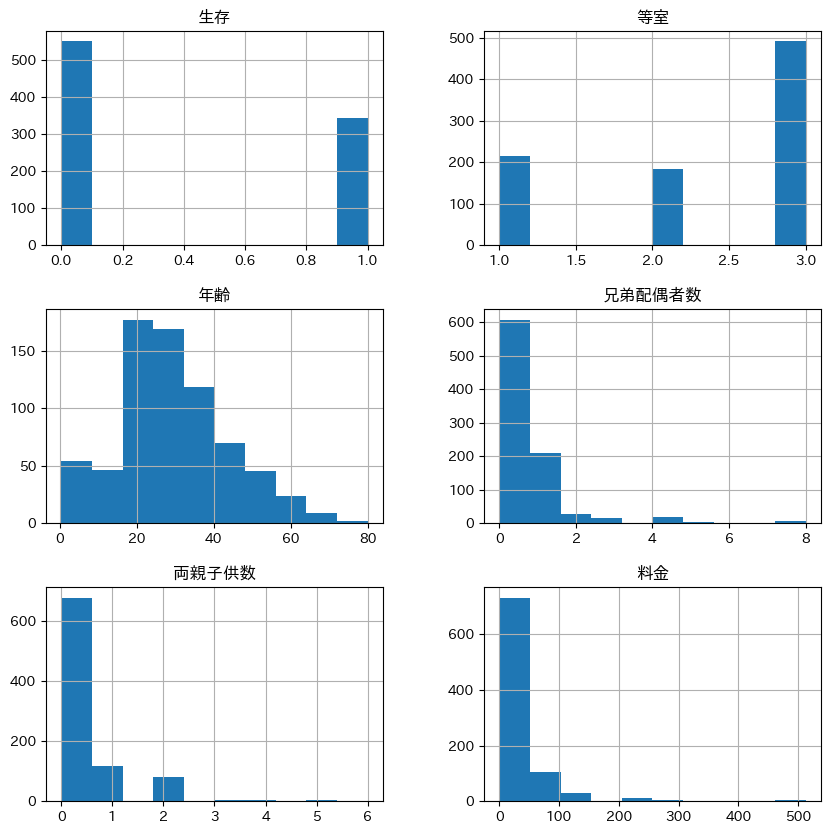

In [10]:
#表示させたい項目
columuns_n = ['生存','等室','年齢','兄弟配偶者数','両親子供数','料金']
#図の縦横のサイズ([横(inch),縦(inch)])
plt.rcParams['figure.figsize']=(10, 10)
#棒グラフ
df_titanic[columuns_n].hist()
#表示
plt.show()

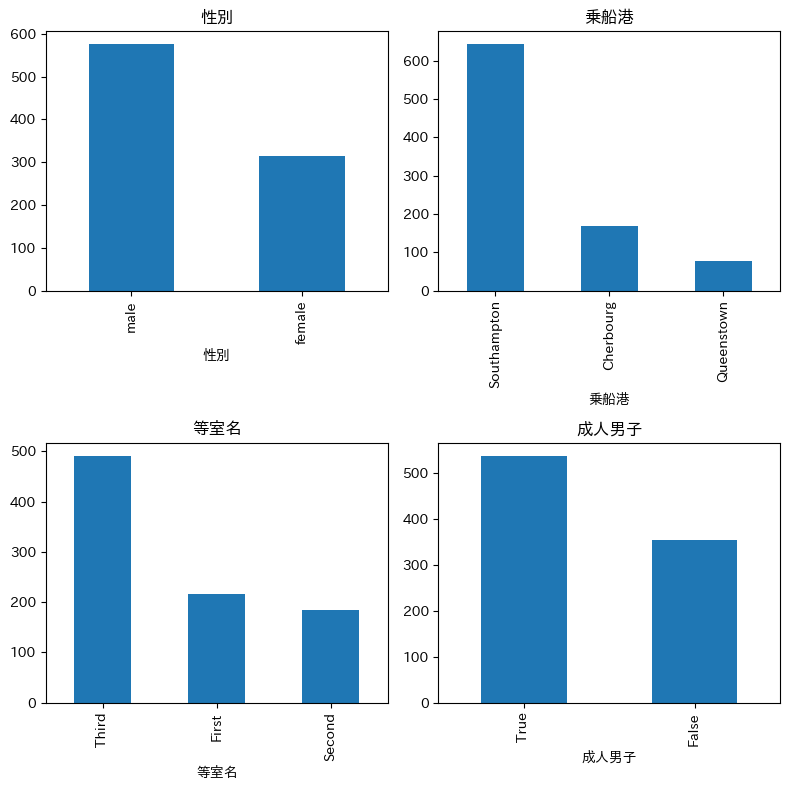

In [11]:
#表示させたい項目
columuns_c = ['性別','乗船港','等室名','成人男子']
#図の縦横のサイズ([横(inch),縦(inch)])
plt.rcParams['figure.figsize']=(8, 8)
#表示させたい項目を１つずつ
for i, name in enumerate(columuns_c):
    ax = plt.subplot(2, 2, i+1)
    #集計値を棒グラフで
    df_titanic[name].value_counts().plot(kind='bar', title=name, ax=ax)
#グラフの余白を埋めたり、オブジェクト（文字列など）が重ならないように位置を調節
plt.tight_layout()
plt.show()